In [85]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [86]:
df = pd.read_csv(r"D:\laptop-price-predictor\laptop_raw_data.csv")
df.head(5)

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [87]:
df.shape

(1303, 12)

In [88]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [89]:
df.duplicated().sum()

np.int64(0)

In [90]:
df.isnull().sum()

Unnamed: 0          0
Company             0
TypeName            0
Inches              0
ScreenResolution    0
Cpu                 0
Ram                 0
Memory              0
Gpu                 0
OpSys               0
Weight              0
Price               0
dtype: int64

# Data Cleaning and Feature Engineering

In [91]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [92]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832


In [93]:
# Step 1: Extract width and height into two new columns
df[['width', 'height']] = df['ScreenResolution'].str.extract(r'(\d{3,4})\s*x\s*(\d{3,4})')

# Step 2: Combine into a single resolution string like 1920x1080
df['Extracted_Resolution'] = df.apply(
    lambda row: f"{row['width']}x{row['height']}" if pd.notnull(row['width']) and pd.notnull(row['height']) else None,
    axis=1
)

# Drop temp columns
df.drop(columns=['width', 'height'], inplace=True)


In [94]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Extracted_Resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000,1920x1080


In [95]:
df.isnull().sum()

Company                 0
TypeName                0
Inches                  0
ScreenResolution        0
Cpu                     0
Ram                     0
Memory                  0
Gpu                     0
OpSys                   0
Weight                  0
Price                   0
Extracted_Resolution    0
dtype: int64

In [96]:
df.rename(columns={'Extracted_Resolution': 'screen_resolution'}, inplace=True)

In [97]:
df['Ram'] = df['Ram'].str.replace('GB','')
df['Weight'] = df['Weight'].str.replace('kg','')

In [98]:
df.head(3)

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080


In [99]:
df['Ram'] = df['Ram'].astype('int32')
df['Weight'] = df['Weight'].astype('float32')

In [100]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [101]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'
        
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [102]:
df

,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,Cpu Name,Cpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,Intel Core i5,Intel Core i5
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,Intel Core i5,Intel Core i5
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,Intel Core i5,Intel Core i5
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,Intel Core i7,Intel Core i7
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,Intel Core i5,Intel Core i5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel Core i7 6500U 2.5GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1920x1080,Intel Core i7,Intel Core i7
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel Core i7 6500U 2.5GHz,16,512GB SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,3200x1800,Intel Core i7,Intel Core i7
1300,Lenovo,Notebook,14.0,1366x768,Intel Celeron Dual Core N3050 1.6GHz,2,64GB Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,1366x768,Intel Celeron Dual,Other Intel Processor
1301,HP,Notebook,15.6,1366x768,Intel Core i7 6500U 2.5GHz,6,1TB HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,1366x768,Intel Core i7,Intel Core i7


In [103]:
df.drop(columns=['Cpu'],inplace=True)

In [104]:
df.drop(columns=['Cpu Name'],inplace=True)

In [105]:
df['Memory'].value_counts()

Memory
256GB SSD                        412
1TB HDD                          223
500GB HDD                        132
512GB SSD                        118
128GB SSD +  1TB HDD              94
128GB SSD                         76
256GB SSD +  1TB HDD              73
32GB Flash Storage                38
2TB HDD                           16
64GB Flash Storage                15
1TB SSD                           14
512GB SSD +  1TB HDD              14
256GB SSD +  2TB HDD              10
1.0TB Hybrid                       9
256GB Flash Storage                8
16GB Flash Storage                 7
32GB SSD                           6
180GB SSD                          5
128GB Flash Storage                4
16GB SSD                           3
512GB SSD +  2TB HDD               3
128GB SSD +  2TB HDD               2
256GB SSD +  256GB SSD             2
512GB Flash Storage                2
1TB SSD +  1TB HDD                 2
256GB SSD +  500GB HDD             2
64GB SSD                       

In [106]:
# Convert to string and remove .0
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)

# Normalize units
df["Memory"] = df["Memory"].str.replace('GB', '', regex=False)
df["Memory"] = df["Memory"].str.replace('TB', '000', regex=False)

# Split by '+'
new = df["Memory"].str.split("+", n=1, expand=True)

# First memory type
df["first"] = new[0].str.strip()

# Second memory type (fill missing with empty string)
df["second"] = new[1].fillna("").str.strip()

# Define function to extract size
def extract_info(mem_str):
    digits = ''.join(filter(str.isdigit, mem_str))
    return int(digits) if digits else 0

# Apply labels
df["Layer1HDD"] = df["first"].str.contains("HDD", case=False).astype(int)
df["Layer1SSD"] = df["first"].str.contains("SSD", case=False).astype(int)
df["Layer1Hybrid"] = df["first"].str.contains("Hybrid", case=False).astype(int)
df["Layer1Flash_Storage"] = df["first"].str.contains("Flash Storage", case=False).astype(int)

df["Layer2HDD"] = df["second"].str.contains("HDD", case=False).astype(int)
df["Layer2SSD"] = df["second"].str.contains("SSD", case=False).astype(int)
df["Layer2Hybrid"] = df["second"].str.contains("Hybrid", case=False).astype(int)
df["Layer2Flash_Storage"] = df["second"].str.contains("Flash Storage", case=False).astype(int)

# Extract numeric values from 'first' and 'second'
df["first"] = df["first"].apply(extract_info)
df["second"] = df["second"].apply(extract_info)

# Calculate sizes
df["HDD"] = df["first"] * df["Layer1HDD"] + df["second"] * df["Layer2HDD"]
df["SSD"] = df["first"] * df["Layer1SSD"] + df["second"] * df["Layer2SSD"]
df["Hybrid"] = df["first"] * df["Layer1Hybrid"] + df["second"] * df["Layer2Hybrid"]
df["Flash_Storage"] = df["first"] * df["Layer1Flash_Storage"] + df["second"] * df["Layer2Flash_Storage"]

# Drop intermediate columns
df.drop(columns=[
    'first', 'second',
    'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid', 'Layer1Flash_Storage',
    'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid', 'Layer2Flash_Storage'
], inplace=True)

<>:2: SyntaxWarning: invalid escape sequence '\.'
<>:2: SyntaxWarning: invalid escape sequence '\.'
C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\1976329461.py:2: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


In [107]:
df

,Company,TypeName,Inches,ScreenResolution,Ram,Memory,Gpu,OpSys,Weight,Price,screen_resolution,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,Intel Core i5,0,128,0,0
1,Apple,Ultrabook,13.3,1440x900,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,1440x900,Intel Core i5,0,0,0,128
2,HP,Notebook,15.6,Full HD 1920x1080,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,1920x1080,Intel Core i5,0,256,0,0
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,2880x1800,Intel Core i7,0,512,0,0
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,2560x1600,Intel Core i5,0,256,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1920x1080,Intel Core i7,0,128,0,0
1299,Lenovo,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,3200x1800,Intel Core i7,0,512,0,0
1300,Lenovo,Notebook,14.0,1366x768,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,1366x768,Other Intel Processor,0,0,0,64
1301,HP,Notebook,15.6,1366x768,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,1366x768,Intel Core i7,1000,0,0,0


In [108]:
df.drop(columns=['Memory','Hybrid','Flash_Storage'],inplace=True)

In [109]:
df.head(1)

,Company,TypeName,Inches,ScreenResolution,Ram,Gpu,OpSys,Weight,Price,screen_resolution,Cpu brand,HDD,SSD
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,2560x1600,Intel Core i5,0,128


In [110]:
df['Gpu'].value_counts()

Gpu
Intel HD Graphics 620      281
Intel HD Graphics 520      185
Intel UHD Graphics 620      68
Nvidia GeForce GTX 1050     66
Nvidia GeForce GTX 1060     48
                          ... 
Nvidia Quadro M500M          1
AMD Radeon R7 M360           1
Nvidia Quadro M3000M         1
Nvidia GeForce 960M          1
ARM Mali T860 MP4            1
Name: count, Length: 110, dtype: int64

In [111]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])

In [112]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
ARM         1
Name: count, dtype: int64

In [113]:
df = df[df['Gpu brand'] != 'ARM']

In [114]:
df['Gpu brand'].value_counts()

Gpu brand
Intel     722
Nvidia    400
AMD       180
Name: count, dtype: int64

In [115]:
df.drop(columns='Gpu', inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\3249613356.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns='Gpu', inplace=True)


In [116]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,OpSys,Weight,Price,screen_resolution,Cpu brand,HDD,SSD,Gpu brand
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,71378.6832,2560x1600,Intel Core i5,0,128,Intel
1,Apple,Ultrabook,13.3,1440x900,8,macOS,1.34,47895.5232,1440x900,Intel Core i5,0,0,Intel
2,HP,Notebook,15.6,Full HD 1920x1080,8,No OS,1.86,30636.0000,1920x1080,Intel Core i5,0,256,Intel
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,macOS,1.83,135195.3360,2880x1800,Intel Core i7,0,512,AMD
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,macOS,1.37,96095.8080,2560x1600,Intel Core i5,0,256,Intel


In [117]:
df['OpSys'].value_counts()

OpSys
Windows 10      1072
No OS             66
Linux             62
Windows 7         45
Chrome OS         26
macOS             13
Mac OS X           8
Windows 10 S       8
Android            2
Name: count, dtype: int64

In [118]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'
    
df['os'] = df['OpSys'].apply(cat_os)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\522358170.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['os'] = df['OpSys'].apply(cat_os)


In [119]:
df['os'].value_counts()

os
Windows               1125
Others/No OS/Linux     156
Mac                     21
Name: count, dtype: int64

In [120]:
df.drop(columns=['OpSys'],inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


In [121]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Weight,Price,screen_resolution,Cpu brand,HDD,SSD,Gpu brand,os
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,71378.6832,2560x1600,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,13.3,1440x900,8,1.34,47895.5232,1440x900,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,15.6,Full HD 1920x1080,8,1.86,30636.0000,1920x1080,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,1.83,135195.3360,2880x1800,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,96095.8080,2560x1600,Intel Core i5,0,256,Intel,Mac


In [125]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:'Yes' if 'Touchscreen' in x else 'No')

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\3806506796.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:'Yes' if 'Touchscreen' in x else 'No')


In [126]:
df['ips'] = df['ScreenResolution'].apply(lambda x:'Yes' if 'IPS' in x else 'No')

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\1538895712.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['ips'] = df['ScreenResolution'].apply(lambda x:'Yes' if 'IPS' in x else 'No')


In [127]:
df.head()

,Company,TypeName,Inches,ScreenResolution,Ram,Weight,Price,screen_resolution,Cpu brand,HDD,SSD,Gpu brand,os,Touchscreen,ips
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,71378.6832,2560x1600,Intel Core i5,0,128,Intel,Mac,No,Yes
1,Apple,Ultrabook,13.3,1440x900,8,1.34,47895.5232,1440x900,Intel Core i5,0,0,Intel,Mac,No,No
2,HP,Notebook,15.6,Full HD 1920x1080,8,1.86,30636.0000,1920x1080,Intel Core i5,0,256,Intel,Others/No OS/Linux,No,No
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,16,1.83,135195.3360,2880x1800,Intel Core i7,0,512,AMD,Mac,No,Yes
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,8,1.37,96095.8080,2560x1600,Intel Core i5,0,256,Intel,Mac,No,Yes


In [128]:
df.drop(columns=['ScreenResolution'],inplace=True)

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\840532398.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['ScreenResolution'],inplace=True)


In [130]:
df.head()

,Company,TypeName,Inches,Ram,Weight,Price,screen_resolution,Cpu brand,HDD,SSD,Gpu brand,os,Touchscreen,ips
0,Apple,Ultrabook,13.3,8,1.37,71378.6832,2560x1600,Intel Core i5,0,128,Intel,Mac,No,Yes
1,Apple,Ultrabook,13.3,8,1.34,47895.5232,1440x900,Intel Core i5,0,0,Intel,Mac,No,No
2,HP,Notebook,15.6,8,1.86,30636.0000,1920x1080,Intel Core i5,0,256,Intel,Others/No OS/Linux,No,No
3,Apple,Ultrabook,15.4,16,1.83,135195.3360,2880x1800,Intel Core i7,0,512,AMD,Mac,No,Yes
4,Apple,Ultrabook,13.3,8,1.37,96095.8080,2560x1600,Intel Core i5,0,256,Intel,Mac,No,Yes


In [131]:

df.rename(columns={
    'Company': 'company',
    'TypeName': 'type',
    'Inches': 'screen_size',
    'Ram': 'ram',
    'Weight': 'weight',
    'Price': 'price',
    'Cpu brand': 'cpu',
    'HDD': 'hdd',
    'SSD': 'ssd',
    'Gpu brand': 'gpu',
    'Touchscreen': 'touchscreen'
}, inplace=True)

df = df[['company', 'type', 'screen_size', 'screen_resolution', 'ips', 'cpu', 'ram', 'ssd', 'hdd', 'gpu', 'touchscreen', 'os', 'weight', 'price']]


C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\2999858043.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={


In [132]:
df.head()

,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight,price
0,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,128,0,Intel,No,Mac,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,No,Intel Core i5,8,0,0,Intel,No,Mac,1.34,47895.5232
2,HP,Notebook,15.6,1920x1080,No,Intel Core i5,8,256,0,Intel,No,Others/No OS/Linux,1.86,30636.0000
3,Apple,Ultrabook,15.4,2880x1800,Yes,Intel Core i7,16,512,0,AMD,No,Mac,1.83,135195.3360
4,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,256,0,Intel,No,Mac,1.37,96095.8080


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   company            1302 non-null   object 
 1   type               1302 non-null   object 
 2   screen_size        1302 non-null   float64
 3   screen_resolution  1302 non-null   object 
 4   ips                1302 non-null   object 
 5   cpu                1302 non-null   object 
 6   ram                1302 non-null   int32  
 7   ssd                1302 non-null   int64  
 8   hdd                1302 non-null   int64  
 9   gpu                1302 non-null   object 
 10  touchscreen        1302 non-null   object 
 11  os                 1302 non-null   object 
 12  weight             1302 non-null   float32
 13  price              1302 non-null   float64
dtypes: float32(1), float64(2), int32(1), int64(2), object(8)
memory usage: 142.4+ KB


# EDA

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\444587821.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['price'])


<Axes: xlabel='price', ylabel='Density'>

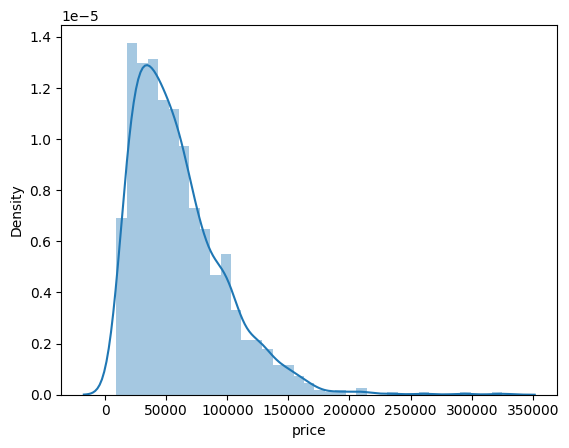

In [134]:
sns.distplot(df['price'])

<Axes: xlabel='company'>

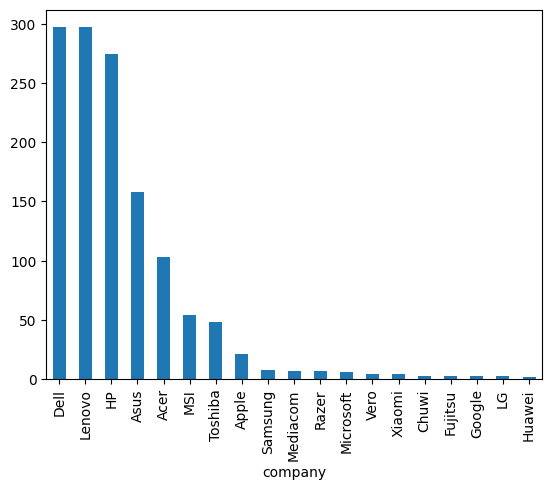

In [135]:
df['company'].value_counts().plot(kind='bar')

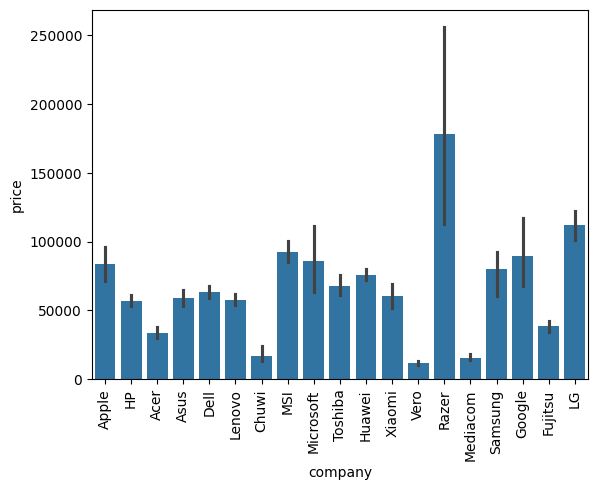

In [136]:
sns.barplot(x=df['company'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='type'>

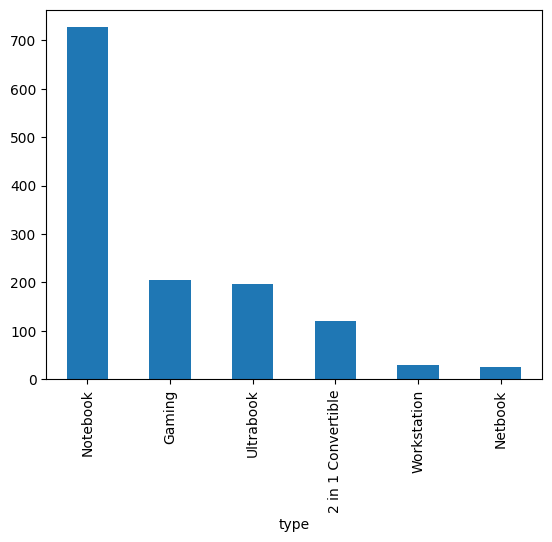

In [137]:
df['type'].value_counts().plot(kind='bar')

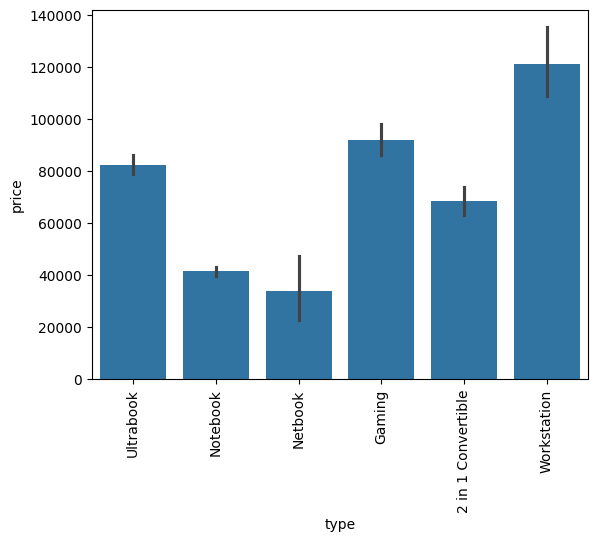

In [140]:
sns.barplot(x=df['type'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='screen_size', ylabel='price'>

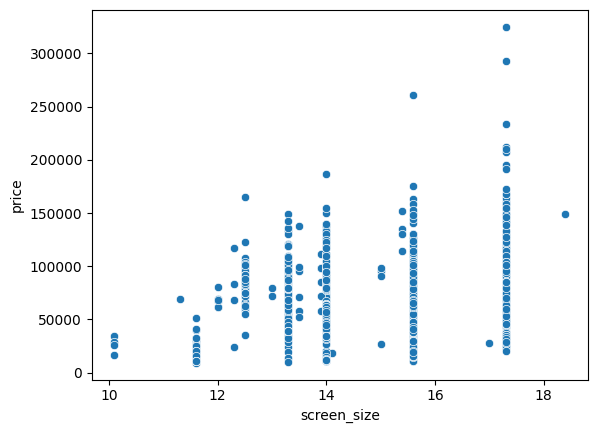

In [145]:
sns.scatterplot(x=df['screen_size'],y=df['price'])

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\56902666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['screen_size'])


<Axes: xlabel='screen_size', ylabel='Density'>

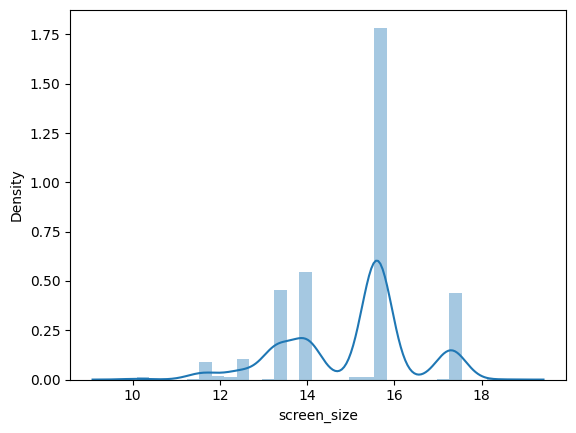

In [141]:
sns.distplot(df['screen_size'])

<Axes: xlabel='touchscreen'>

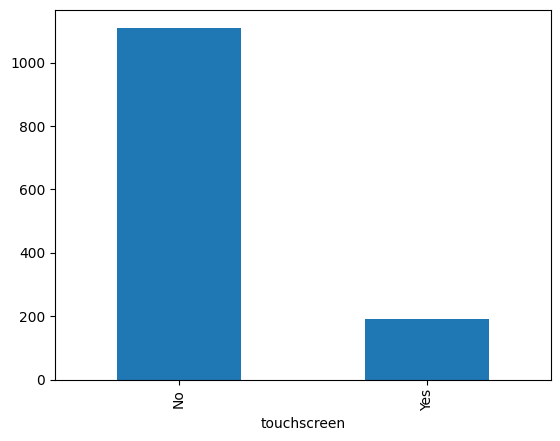

In [147]:
df['touchscreen'].value_counts().plot(kind='bar')

<Axes: xlabel='touchscreen', ylabel='price'>

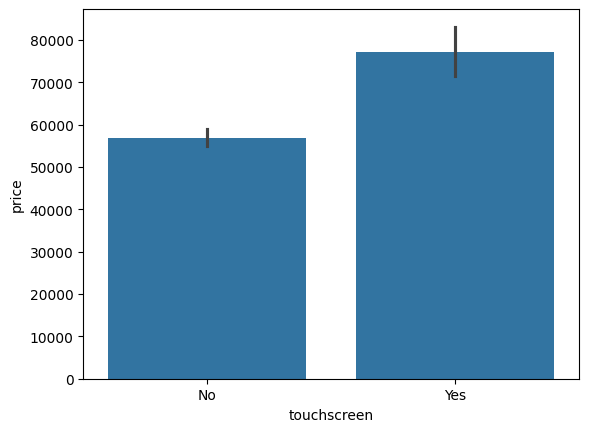

In [148]:
sns.barplot(x=df['touchscreen'],y=df['price'])

<Axes: xlabel='ips'>

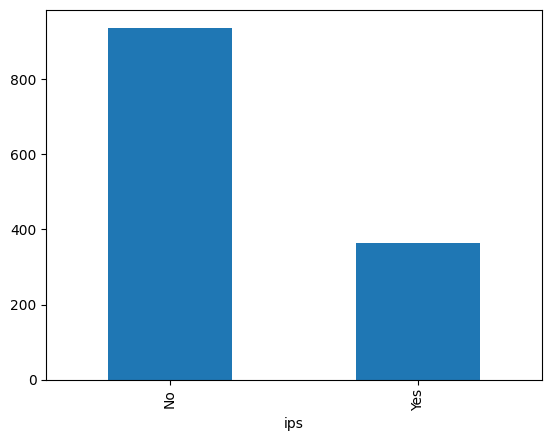

In [149]:
df['ips'].value_counts().plot(kind='bar')

<Axes: xlabel='ips', ylabel='price'>

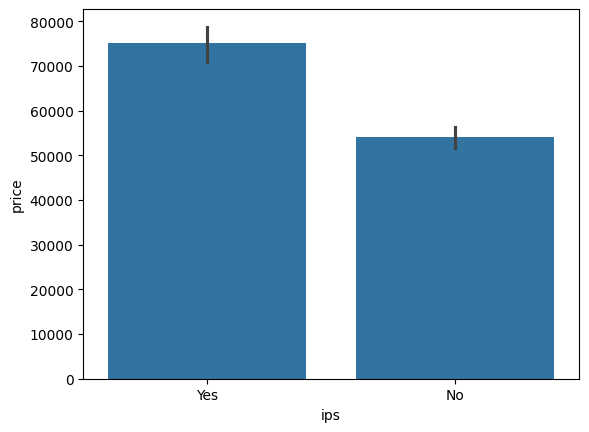

In [150]:
sns.barplot(x=df['ips'],y=df['price'])

<Axes: xlabel='cpu'>

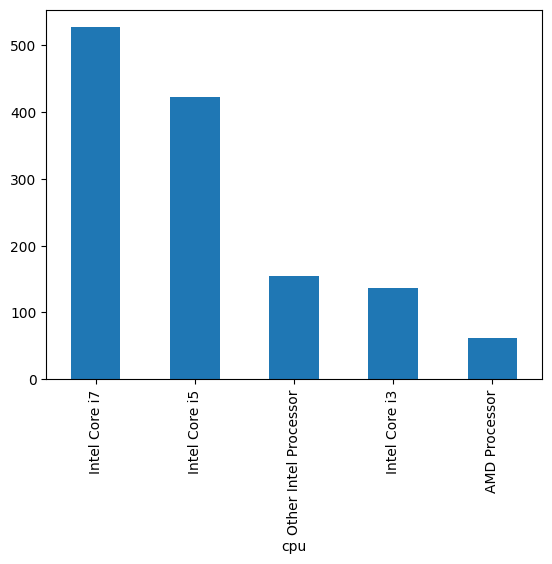

In [151]:
df['cpu'].value_counts().plot(kind='bar')

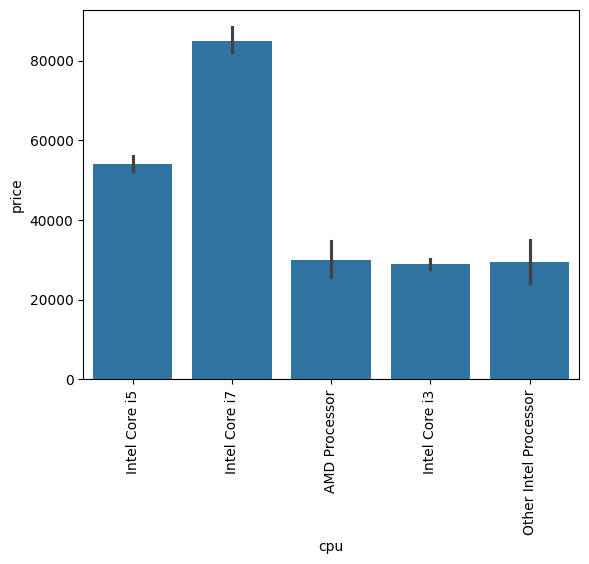

In [153]:
sns.barplot(x=df['cpu'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

<Axes: xlabel='ram'>

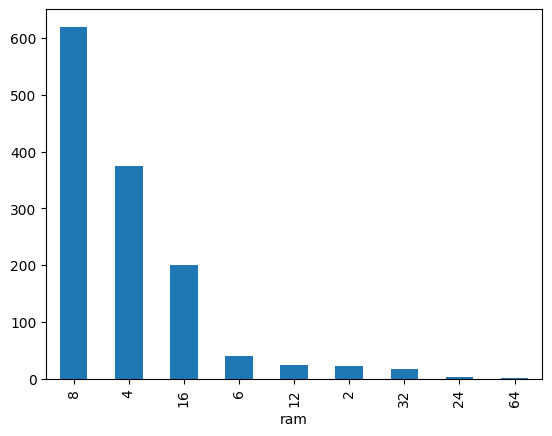

In [154]:
df['ram'].value_counts().plot(kind='bar')

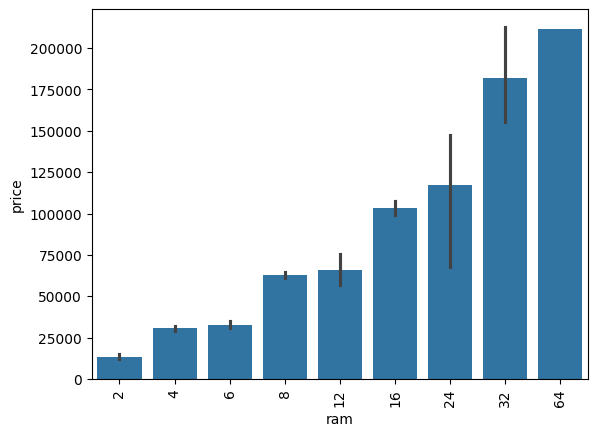

In [155]:
sns.barplot(x=df['ram'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

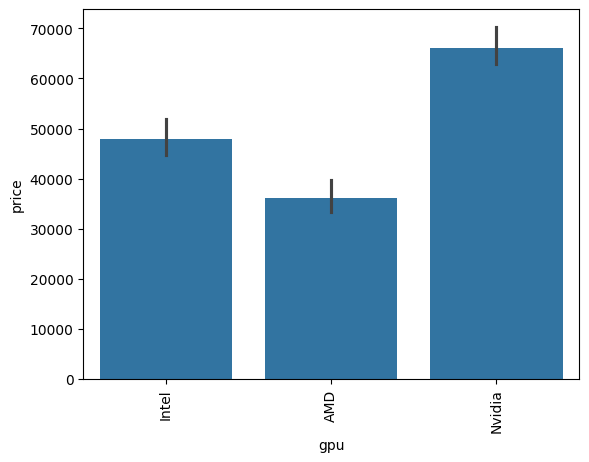

In [158]:
sns.barplot(x=df['gpu'],y=df['price'],estimator=np.median)
plt.xticks(rotation='vertical')
plt.show()

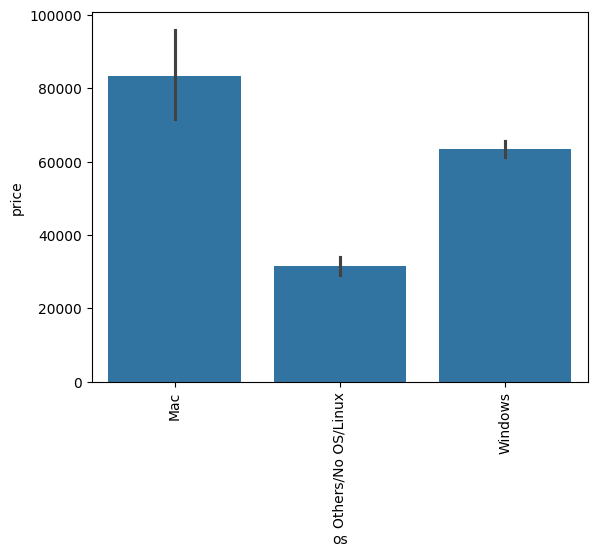

In [159]:
sns.barplot(x=df['os'],y=df['price'])
plt.xticks(rotation='vertical')
plt.show()

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\3941653390.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['weight'])


<Axes: xlabel='weight', ylabel='Density'>

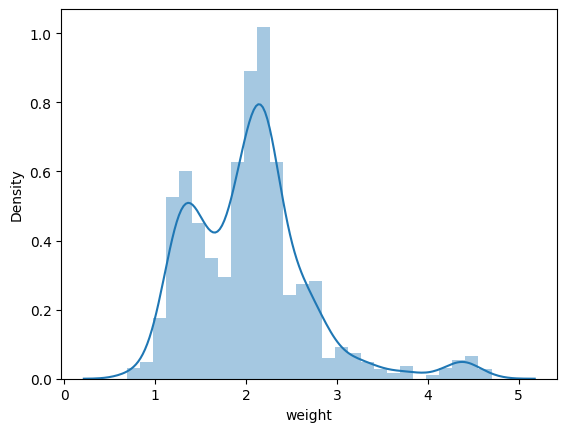

In [161]:
sns.distplot(df['weight'])

<Axes: xlabel='weight', ylabel='price'>

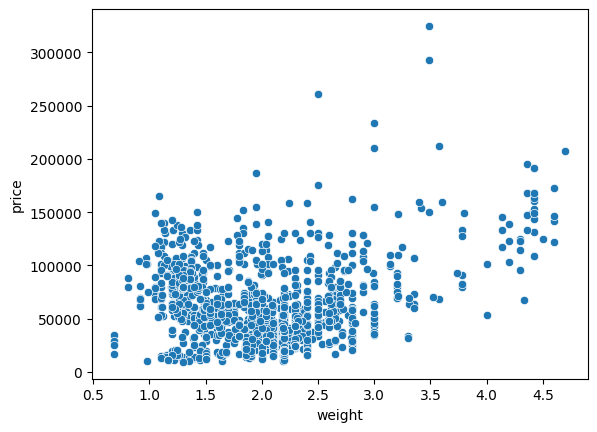

In [162]:
sns.scatterplot(x=df['weight'],y=df['price'])

In [164]:
numeric_df = df.select_dtypes(include='number')

In [165]:
corr_matrix = numeric_df.corr()

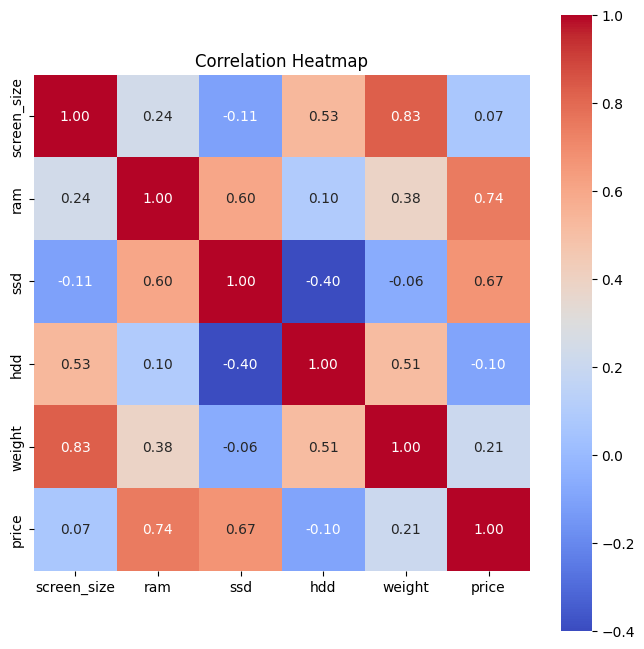

In [166]:
plt.figure(figsize=(8, 8))  
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap")
plt.show()

In [169]:
numeric_df.corr()['price']

screen_size    0.067329
ram            0.742905
ssd            0.670660
hdd           -0.096891
weight         0.209867
price          1.000000
Name: price, dtype: float64

C:\Users\Acer\AppData\Local\Temp\ipykernel_19268\2721140454.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['price']))


<Axes: xlabel='price', ylabel='Density'>

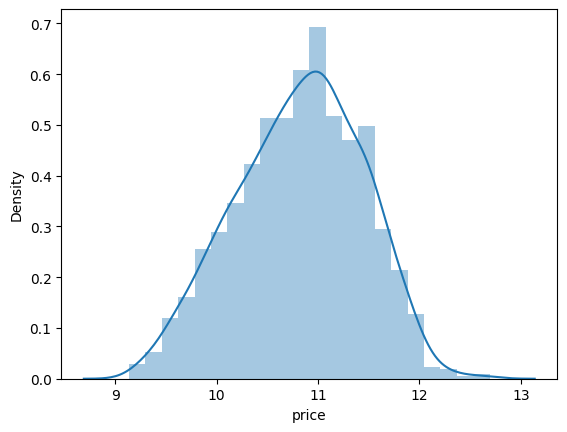

In [167]:
sns.distplot(np.log(df['price']))

In [170]:
X = df.drop(columns=['price'])
y = np.log(df['price'])

In [171]:
X.head(3)

,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight
0,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,128,0,Intel,No,Mac,1.37
1,Apple,Ultrabook,13.3,1440x900,No,Intel Core i5,8,0,0,Intel,No,Mac,1.34
2,HP,Notebook,15.6,1920x1080,No,Intel Core i5,8,256,0,Intel,No,Others/No OS/Linux,1.86


In [172]:
y

0       11.175755
1       10.776777
2       10.329931
3       11.814476
4       11.473101
          ...    
1298    10.433899
1299    11.288115
1300     9.409283
1301    10.614129
1302     9.886358
Name: price, Length: 1302, dtype: float64

In [173]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.15,random_state=2)

In [174]:
X_train

,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight
183,Toshiba,Notebook,15.6,1366x768,No,Intel Core i5,8,128,0,Intel,No,Windows,2.00
1141,MSI,Gaming,15.6,1920x1080,No,Intel Core i7,8,128,1000,Nvidia,No,Windows,2.40
1049,Asus,Netbook,11.6,1366x768,No,Other Intel Processor,4,0,0,Intel,No,Others/No OS/Linux,1.20
1020,Dell,2 in 1 Convertible,15.6,1920x1080,Yes,Intel Core i3,4,0,1000,Intel,Yes,Windows,2.08
878,Dell,Notebook,15.6,1920x1080,No,Intel Core i5,4,128,1000,Nvidia,No,Windows,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,1366x768,No,Intel Core i3,4,0,500,Nvidia,No,Windows,2.20
299,Asus,Ultrabook,15.6,1920x1080,No,Intel Core i7,16,512,0,Nvidia,No,Windows,1.63
493,Acer,Notebook,15.6,1366x768,No,AMD Processor,8,0,1000,AMD,No,Windows,2.20
527,Lenovo,Notebook,15.6,1366x768,No,Intel Core i3,8,0,2000,Nvidia,No,Others/No OS/Linux,2.20


In [175]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score,mean_absolute_error
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor,AdaBoostRegressor,ExtraTreesRegressor,VotingRegressor,StackingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor

In [176]:
df.head(1)

,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight,price
0,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,128,0,Intel,No,Mac,1.37,71378.6832


### Linear regression

In [177]:
# Step 1: OneHotEncode selected columns, ignore unknowns
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,3,4,5,9,10,11])
], remainder='passthrough')

# Step 2: Linear Regression model
step2 = LinearRegression()

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8017131345567478
MAE: 0.21274840484152155


In [178]:
np.exp(0.18)

np.float64(1.1972173631218102)

### Ridge Regression

In [179]:
# Define transformer with updated parameters
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,3,4,5,9,10,11])
], remainder='passthrough')

# Define Ridge regression model
step2 = Ridge(alpha=10)

# Create pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train the model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8057829736602837
MAE: 0.2082851099162198


### Lasso Regression

In [180]:
# Step 1: One-hot encode selected categorical columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,3,4,5,9,10,11])
], remainder='passthrough')

# Step 2: Lasso regression
step2 = Lasso(alpha=0.0001)

# Build pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8025677017107343
MAE: 0.21185098584330314


### KNN

In [181]:
# Step 1: One-hot encoding for categorical columns
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,3,4,5,9,10,11])
], remainder='passthrough')

# Step 2: KNN Regressor
step2 = KNeighborsRegressor(n_neighbors=3)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit and evaluate
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8451164652110092
MAE: 0.17803809661642112


### Decision Tree

In [182]:
# Step 1: Updated OneHotEncoder with modern parameters
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,3,4,5,9,10,11])
], remainder='passthrough')

# Step 2: Decision Tree Regressor
step2 = DecisionTreeRegressor(max_depth=8)

# Create and train the pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8355885699473738
MAE: 0.18952467851940952


### SVM

In [183]:
# Step 1: One-hot encoding
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), [0,1,3,4,5,9,10,11])
], remainder='passthrough')

# Step 2: Support Vector Regressor
step2 = SVR(kernel='rbf', C=10000, epsilon=0.1)

# Pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Train and predict
pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8420087669219793
MAE: 0.1915789971279462


### Random Forest

In [193]:
# Step 1: Column transformation (One-hot encoding)
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), 
     [0,1,3,4,5,9,10,11])
], remainder='passthrough')

# Step 2: Random Forest Regressor
step2 = RandomForestRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15
)

# Pipeline creation
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Model training
pipe.fit(X_train, y_train)

# Prediction
y_pred = pipe.predict(X_test)

# Evaluation
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8918216350016688
MAE: 0.15507938684401495


### ExtraTrees

In [185]:
# Step 1: One-hot encode categorical columns, ignoring unknown categories
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     [0,1,3,4,5,9,10,11])
], remainder='passthrough')

# Step 2: ExtraTreesRegressor with bootstrap=True because max_samples is used
step2 = ExtraTreesRegressor(
    n_estimators=100,
    random_state=3,
    max_samples=0.5,
    max_features=0.75,
    max_depth=15,
    bootstrap=True
)

# Build pipeline
pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

# Fit model
pipe.fit(X_train, y_train)

# Predict
y_pred = pipe.predict(X_test)

# Evaluate
print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8898420934445117
MAE: 0.15801282550122037


### AdaBoost

In [186]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     [0,1,3,4,5,9,10,11])
], remainder='passthrough')

step2 = AdaBoostRegressor(n_estimators=15, learning_rate=1.0)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.7833823062651533
MAE: 0.23673853211945042


### Gradient Boost

In [187]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     [0,1,3,4,5,9,10,11])
], remainder='passthrough')

step2 = GradientBoostingRegressor(n_estimators=500)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8826169934852949
MAE: 0.1589245894328051


### XGBoost

In [189]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     [0,1,3,4,5,9,10,11])
], remainder='passthrough')

step2 = XGBRegressor(n_estimators=45, max_depth=5, learning_rate=0.5)

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))


R2 score: 0.8869194673474522
MAE: 0.1546425752100614


### Voting Regressor

In [190]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     [0,1,3,4,5,9,10,11])
], remainder='passthrough')

rf = RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15, bootstrap=True)
gbdt = GradientBoostingRegressor(n_estimators=100, max_features=0.5)
xgb = XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5)
et = ExtraTreesRegressor(n_estimators=100, random_state=3, max_samples=0.5, max_features=0.75, max_depth=10, bootstrap=True)

step2 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb', xgb), ('et', et)], weights=[5,1,1,1])

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)
y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.892571098615694
MAE: 0.15440148664510195


### Stacking

In [192]:
step1 = ColumnTransformer(transformers=[
    ('col_tnf', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'),
     [0,1,3,4,5,9,10,11])
], remainder='passthrough')

estimators = [
    ('rf', RandomForestRegressor(n_estimators=350, random_state=3, max_samples=0.5, max_features=0.75, max_depth=15, bootstrap=True)),
    ('gbdt', GradientBoostingRegressor(n_estimators=100, max_features=0.5)),
    ('xgb', XGBRegressor(n_estimators=25, learning_rate=0.3, max_depth=5))
]

step2 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

pipe = Pipeline([
    ('step1', step1),
    ('step2', step2)
])

pipe.fit(X_train, y_train)

y_pred = pipe.predict(X_test)

print('R2 score:', r2_score(y_test, y_pred))
print('MAE:', mean_absolute_error(y_test, y_pred))

R2 score: 0.8856944798630354
MAE: 0.1606740714070597


### Exporting the Model

Choosing Random Forest ML algorithm for this project because of it's higher R2 score and lower MAE.

In [194]:
import pickle

pickle.dump(df,open('df.pkl','wb'))
pickle.dump(pipe,open('pipe.pkl','wb'))

In [195]:
df

,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight,price
0,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,128,0,Intel,No,Mac,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,No,Intel Core i5,8,0,0,Intel,No,Mac,1.34,47895.5232
2,HP,Notebook,15.6,1920x1080,No,Intel Core i5,8,256,0,Intel,No,Others/No OS/Linux,1.86,30636.0000
3,Apple,Ultrabook,15.4,2880x1800,Yes,Intel Core i7,16,512,0,AMD,No,Mac,1.83,135195.3360
4,Apple,Ultrabook,13.3,2560x1600,Yes,Intel Core i5,8,256,0,Intel,No,Mac,1.37,96095.8080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,14.0,1920x1080,Yes,Intel Core i7,4,128,0,Intel,Yes,Windows,1.80,33992.6400
1299,Lenovo,2 in 1 Convertible,13.3,3200x1800,Yes,Intel Core i7,16,512,0,Intel,Yes,Windows,1.30,79866.7200
1300,Lenovo,Notebook,14.0,1366x768,No,Other Intel Processor,2,0,0,Intel,No,Windows,1.50,12201.1200
1301,HP,Notebook,15.6,1366x768,No,Intel Core i7,6,0,1000,AMD,No,Windows,2.19,40705.9200


In [196]:
X_train

,company,type,screen_size,screen_resolution,ips,cpu,ram,ssd,hdd,gpu,touchscreen,os,weight
183,Toshiba,Notebook,15.6,1366x768,No,Intel Core i5,8,128,0,Intel,No,Windows,2.00
1141,MSI,Gaming,15.6,1920x1080,No,Intel Core i7,8,128,1000,Nvidia,No,Windows,2.40
1049,Asus,Netbook,11.6,1366x768,No,Other Intel Processor,4,0,0,Intel,No,Others/No OS/Linux,1.20
1020,Dell,2 in 1 Convertible,15.6,1920x1080,Yes,Intel Core i3,4,0,1000,Intel,Yes,Windows,2.08
878,Dell,Notebook,15.6,1920x1080,No,Intel Core i5,4,128,1000,Nvidia,No,Windows,2.18
...,...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,15.6,1366x768,No,Intel Core i3,4,0,500,Nvidia,No,Windows,2.20
299,Asus,Ultrabook,15.6,1920x1080,No,Intel Core i7,16,512,0,Nvidia,No,Windows,1.63
493,Acer,Notebook,15.6,1366x768,No,AMD Processor,8,0,1000,AMD,No,Windows,2.20
527,Lenovo,Notebook,15.6,1366x768,No,Intel Core i3,8,0,2000,Nvidia,No,Others/No OS/Linux,2.20


In [197]:
df.to_csv('laptop_processed_data.csv', index=False)
